In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix,
                             ConfusionMatrixDisplay,
                             classification_report)
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler


import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.columns = [col.lower() for col in train_data.columns]
test_data.columns = [col.lower() for col in test_data.columns]

train_data.drop('id',axis=1,inplace=True)
ids = test_data.pop('id')

In [3]:
neg = train_data[train_data['target']==0]
pos = train_data[train_data['target']==1]

In [4]:
# creating our train/test split 004450
strat_train_set, strat_test_set = train_test_split(
    train_data, test_size=0.2, stratify=train_data["target"], random_state=42)

train_features = strat_train_set.drop('target',axis=1)
train_label = strat_train_set.target

test_features = strat_test_set.drop('target',axis=1)
test_label = strat_test_set.target

In [5]:
target = train_data.pop('target')

In [6]:
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import random as tf_random
from keras.optimizers import Adam
from keras import callbacks

In [7]:
seed = 42
random.seed(seed)
np.random.seed(seed)
tf_random.set_seed(seed)

In [8]:
# num_epochs = 15
num_epochs = 30
learning_rate = 0.0001
# layer_1 = 16
# layer_2 = 4
# output_layer = 1

weight_for_0 = (1 / neg.shape[0]) * (train_data.shape[0] / 2.0) -1.6
weight_for_1 = (1 / pos.shape[0]) * (train_data.shape[0]  / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.08
Weight for class 1: 0.61


In [9]:
model = keras.Sequential([
                            layers.Dense(84),
                            layers.Dense(64, activation="relu"),
                            layers.Dense(16, activation="relu"),
                            layers.Dense(1,activation='sigmoid')
                            ])
model.compile(optimizer= Adam(learning_rate=learning_rate),
              loss="binary_crossentropy", metrics=["binary_accuracy"])
# ,
history = model.fit(train_features,train_label,epochs=num_epochs,
                     class_weight=class_weight,
                    # validation_split=0.2,
                    # verbose = 0,
                   # callbacks
                   )

Epoch 1/30
183/183 [==============================] - 1s 2ms/step - loss: 0.7091 - binary_accuracy: 0.6753
Epoch 2/30
183/183 [==============================] - 0s 2ms/step - loss: 0.4666 - binary_accuracy: 0.7374
Epoch 3/30
183/183 [==============================] - 0s 2ms/step - loss: 0.4383 - binary_accuracy: 0.7619
Epoch 4/30
183/183 [==============================] - 0s 2ms/step - loss: 0.4208 - binary_accuracy: 0.7749
Epoch 5/30
183/183 [==============================] - 0s 2ms/step - loss: 0.4123 - binary_accuracy: 0.7790
Epoch 6/30
183/183 [==============================] - 0s 2ms/step - loss: 0.4091 - binary_accuracy: 0.7775
Epoch 7/30
183/183 [==============================] - 0s 2ms/step - loss: 0.3811 - binary_accuracy: 0.7975
Epoch 8/30
183/183 [==============================] - 0s 2ms/step - loss: 0.3697 - binary_accuracy: 0.7997
Epoch 9/30
183/183 [==============================] - 0s 2ms/step - loss: 0.3609 - binary_accuracy: 0.8078
Epoch 10/30
183/183 [================

In [10]:
predictions = model.predict(test_features)
predictions = np.where(predictions[:,0]<0.5,0,1)
predictions

46/46 [==============================] - 0s 1ms/step


array([0, 1, 0, ..., 0, 1, 1])

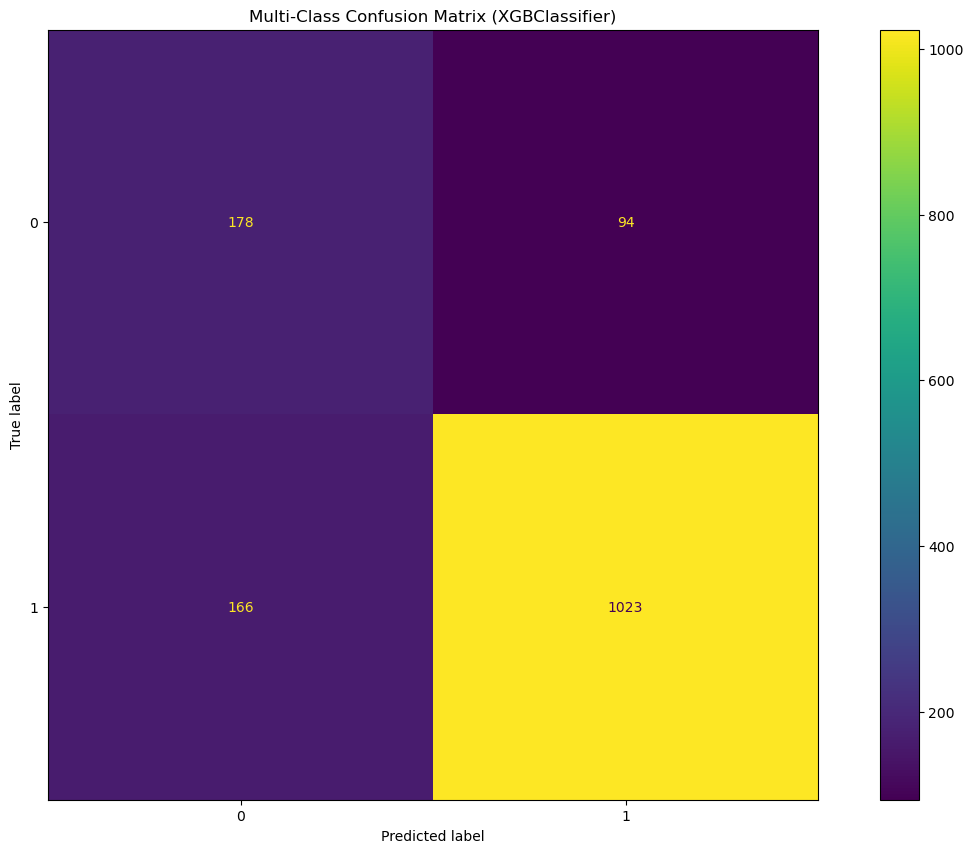

In [11]:
# let's plot a confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(test_label,predictions)

fig = disp.figure_
fig.set_figwidth(16)
fig.set_figheight(10)
plt.title('Multi-Class Confusion Matrix (XGBClassifier)');

In [12]:
# performance stats 
print(classification_report(test_label,predictions))

              precision    recall  f1-score   support

           0       0.52      0.65      0.58       272
           1       0.92      0.86      0.89      1189

    accuracy                           0.82      1461
   macro avg       0.72      0.76      0.73      1461
weighted avg       0.84      0.82      0.83      1461



In [13]:
history = model.fit(train_data,target,epochs=5,
                     class_weight=class_weight,
                    # validation_split=0.2,
                    # verbose = 0,
                   # callbacks
                   )

Epoch 1/5
229/229 [==============================] - 0s 2ms/step - loss: 0.2832 - binary_accuracy: 0.8101
Epoch 2/5
229/229 [==============================] - 1s 2ms/step - loss: 0.2785 - binary_accuracy: 0.8080
Epoch 3/5
229/229 [==============================] - 0s 2ms/step - loss: 0.2810 - binary_accuracy: 0.8087
Epoch 4/5
229/229 [==============================] - 0s 2ms/step - loss: 0.2877 - binary_accuracy: 0.8031
Epoch 5/5
229/229 [==============================] - 0s 2ms/step - loss: 0.2705 - binary_accuracy: 0.8151


In [14]:
predictions = model.predict(test_data)
predictions = np.where(predictions[:,0]<0.5,0,1)
predictions

85/85 [==============================] - 0s 1ms/step


array([1, 1, 1, ..., 1, 1, 0])

In [15]:
data = pd.DataFrame({'id':ids,'target':predictions})

In [16]:
data.to_csv('submission_dl.csv',index=False)